### Sample code for Principal Component Analysis (PCA)  

#### Import libraries  

In [1]:
#Cell_1.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#### Parameters  

In [2]:
#Cell_2.
csv_in = 'wine-modified.csv'

# To show all rows and columns in the results 
pd.options.display.max_columns=999
pd.options.display.max_rows=999

#### Read CSV file  

In [3]:
#Cell_3.
df = pd.read_csv(csv_in, sep=',', skiprows=0, header=0)
print(df.shape)
print(df.info())
display(df.head())

(178, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class                         178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic_acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity_of_ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total_phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid_phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color_intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315_of_diluted_wines  178 non-null    float64


,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


#### Set data  

In [4]:
#Cell_4.
dfX = df.loc[:, 'Alcohol':]
n=dfX.shape[0] #sample size.
p=dfX.shape[1] #number of features.
print(n)
print(dfX.shape)
display(dfX.head())

178
(178, 13)


,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315_of_diluted_wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


#### Standardization  

In [5]:
#Cell_5.
sc = StandardScaler()
X_std = sc.fit_transform(dfX)*(np.sqrt(n-1))/(np.sqrt(n))
print(X_std)

[[ 1.51434077 -0.56066822  0.23139979 ...  0.36115849  1.84272147
   1.01015939]
 [ 0.24559683 -0.49800856 -0.82566722 ...  0.40490846  1.11031723
   0.96252635]
 [ 0.19632522  0.02117152  1.10621386 ...  0.31740852  0.7863692
   1.3912237 ]
 ...
 [ 0.33182214  1.73983662 -0.38826018 ... -1.60759033 -1.481267
   0.27978612]
 [ 0.20864312  0.22705328  0.01269627 ... -1.56384035 -1.39675882
   0.2956638 ]
 [ 1.39116174  1.57871176  1.36136797 ... -1.52009038 -1.42492821
  -0.59348626]]


#### PCA  

In [6]:
#Cell_6.
n_pca = 13
pca = PCA(n_components=n_pca)
X_pca = pca.fit_transform(X_std)

#### PC coordinates  

In [7]:
#Cell_7.
#主成分得点
print(X_pca.shape)
print(X_pca[:5])

(178, 13)
[[ 3.30742097e+00 -1.43940225e+00 -1.65272830e-01 -2.15024629e-01
   6.91093349e-01 -2.23250366e-01  5.94748831e-01  6.49558620e-02
   6.39638363e-01  1.01808396e+00 -4.50293172e-01  5.39289144e-01
  -6.60523053e-02]
 [ 2.20324981e+00  3.32455071e-01 -2.02075706e+00 -2.90538743e-01
  -2.56929866e-01 -9.24512306e-01  5.36243450e-02  1.02153432e+00
  -3.07977984e-01  1.59252141e-01 -1.42256019e-01  3.87145650e-01
   3.62627319e-03]
 [ 2.50966069e+00 -1.02825072e+00  9.80054055e-01  7.22863199e-01
  -2.50326976e-01  5.47730963e-01  4.23012184e-01 -3.43247870e-01
  -1.17452129e+00  1.13041979e-01 -2.85866453e-01  5.81931623e-04
   2.16554231e-02]
 [ 3.74649719e+00 -2.74861839e+00 -1.75696224e-01  5.66385602e-01
  -3.10964398e-01  1.14109112e-01 -3.82258990e-01  6.41783105e-01
   5.23966169e-02  2.38739150e-01  7.57447643e-01 -2.41338776e-01
  -3.68444194e-01]
 [ 1.00607049e+00 -8.67384035e-01  2.02098726e+00 -4.08613140e-01
   2.97617958e-01 -4.05376083e-01  4.42825306e-01  4.155

In [8]:
#Cell_8.
#固有値
print('eigenvalues:',pca.explained_variance_)
#固有ベクトルの成分
print('eigenvectors:',pca.components_)

eigenvalues: [4.70585025 2.49697373 1.44607197 0.91897392 0.85322818 0.64165703
 0.55102831 0.34849736 0.28887994 0.25090248 0.22578864 0.16877023
 0.10337794]
eigenvectors: [[ 0.1443294  -0.24518758 -0.00205106 -0.23932041  0.14199204  0.39466085
   0.4229343  -0.2985331   0.31342949 -0.0886167   0.29671456  0.37616741
   0.28675223]
 [-0.48365155 -0.22493093 -0.31606881  0.0105905  -0.299634   -0.06503951
   0.00335981 -0.02877949 -0.03930172 -0.52999567  0.27923515  0.16449619
  -0.36490283]
 [-0.20738262  0.08901289  0.6262239   0.61208035  0.13075693  0.14617896
   0.1506819   0.17036816  0.14945431 -0.13730621  0.08522192  0.16600459
  -0.12674592]
 [-0.0178563   0.53689028 -0.21417556  0.06085941 -0.35179658  0.19806835
   0.15229479 -0.20330102  0.39905653  0.06592568 -0.42777141  0.18412074
  -0.23207086]
 [-0.26566365  0.03521363 -0.14302547  0.06610294  0.72704851 -0.14931841
  -0.10902584 -0.50070298  0.13685982 -0.07643678 -0.17361452 -0.10116099
  -0.1578688 ]
 [-0.213538

In [9]:
#Cell_9.
#因子負荷量
loadings = pca.components_.T * np.sqrt(pca.explained_variance_) 
print(loadings)

[[ 0.31309335 -0.76425725 -0.24938327 -0.01711761 -0.24539445 -0.17105193
  -0.04186374 -0.23385552  0.27337033  0.10599316 -0.10734946 -0.10939488
   0.00481321]
 [-0.53188473 -0.35543171  0.10704043  0.51467982  0.03252695 -0.43000667
   0.31216029 -0.03885994 -0.04046279 -0.15481866  0.0363438   0.04999474
   0.00834798]
 [-0.00444936 -0.49944611  0.75305135 -0.20531539 -0.13211313 -0.12373961
  -0.11073126  0.10051073 -0.16537823 -0.01358715 -0.23696431 -0.02038569
  -0.04540504]
 [-0.51915708  0.01673492  0.73604335  0.05834174  0.06105952  0.08076395
  -0.21302087 -0.25264649  0.1077366   0.02644732  0.22775659 -0.02290009
   0.02947827]
 [ 0.30802294 -0.47347612  0.15723879 -0.3372432   0.67157727 -0.03055463
   0.23968041  0.09230588  0.14587224  0.03399631  0.03387451  0.02556105
   0.0182543 ]
 [ 0.85613666 -0.10277424  0.1757842   0.18987451 -0.13792594  0.0673849
  -0.02072907  0.23963777  0.15373655 -0.16035433  0.14461448 -0.12483994
  -0.14915771]
 [ 0.91747018  0.005309

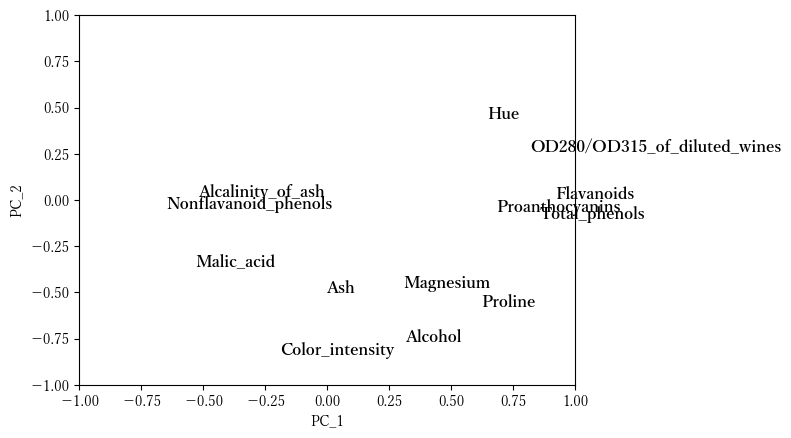

In [10]:
#Cell_10.因子負荷量の可視化
font = {'family' : 'Yu Mincho'}
plt.rc('font', **font)

plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel('PC_1')
plt.ylabel('PC_2')
for i in range(p):
    plt.text(loadings[i,0],loadings[i,1], str(dfX.columns[i]),fontdict={'weight':'bold','size':12})

plt.show()

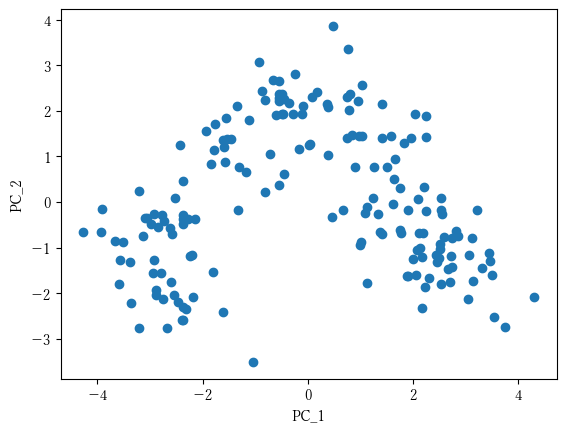

In [11]:
#Cell_11.主成分得点の可視化
plt.xlabel('PC_1')
plt.ylabel('PC_2')
plt.scatter(X_pca[:,0],X_pca[:,1])
plt.show()

#### Check contribution ratio  

In [12]:
#Cell_12.
print("各主成分ごとの寄与率：",pca.explained_variance_ratio_)
print("各主成分までの累積寄与率：",np.cumsum(pca.explained_variance_ratio_))

各主成分ごとの寄与率： [0.36198848 0.1920749  0.11123631 0.0706903  0.06563294 0.04935823
 0.04238679 0.02680749 0.02222153 0.01930019 0.01736836 0.01298233
 0.00795215]
各主成分までの累積寄与率： [0.36198848 0.55406338 0.66529969 0.73598999 0.80162293 0.85098116
 0.89336795 0.92017544 0.94239698 0.96169717 0.97906553 0.99204785
 1.        ]


#### Draw graph of contribution  

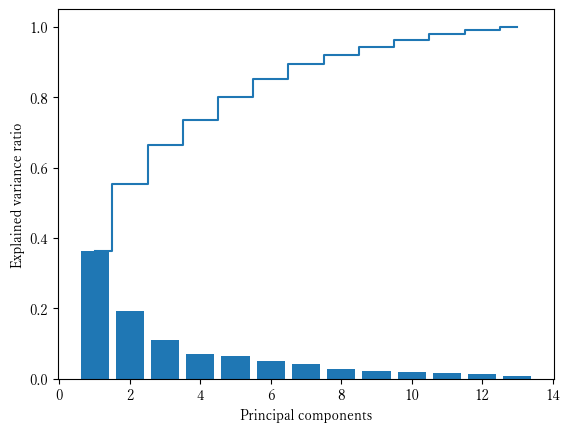

In [13]:
#Cell_13.
xx = range(1, n_pca+1)
plt.bar(xx, pca.explained_variance_ratio_)
plt.step(xx, np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

#### 2D plot 

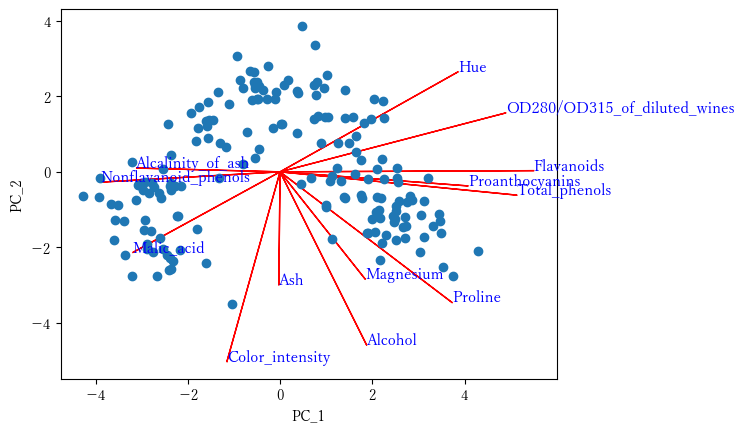

In [14]:
#Cell_14.
def biplot(X_2d, coef_2d, coef_labels=None):
    r1 = 6
    r2 = 1
    coef_2dT = coef_2d.T
    if coef_labels is None:
        coef_labels = range(len(coef_2dT))
    for i, coef in enumerate(coef_2dT):
        plt.arrow(0, 0, coef[0]*r1, coef[1]*r1, color='r')    
        plt.text(coef[0]*r1*r2, coef[1]*r1*r2, coef_labels[i],
                 color='b', fontsize=11)
    plt.scatter(X_2d[:,0], X_2d[:,1])
    plt.xlabel('PC_1')
    plt.ylabel('PC_2')
    return None

biplot(X_pca[:, :2], loadings.T[:2], coef_labels=dfX.columns)

In [25]:
loadings[:,0:2]

array([[ 0.31309335, -0.76425725],
       [-0.53188473, -0.35543171],
       [-0.00444936, -0.49944611],
       [-0.51915708,  0.01673492],
       [ 0.30802294, -0.47347612],
       [ 0.85613666, -0.10277424],
       [ 0.91747018,  0.00530911],
       [-0.64760702, -0.04547682],
       [ 0.6799217 , -0.06210386],
       [-0.19223597, -0.83748938],
       [ 0.64366207,  0.44124223],
       [ 0.8160189 ,  0.25993385],
       [ 0.6220508 , -0.57661272]])

In [15]:
# classごとに色を変える

In [16]:
#Cell_15.
ser_class = df['Class']
print(ser_class.value_counts())

Class
2    71
1    59
3    48
Name: count, dtype: int64


In [17]:
#Cell_16.
classes = ser_class.unique()
print(classes)
colors = ['blue', 'red', 'green']

[1 2 3]


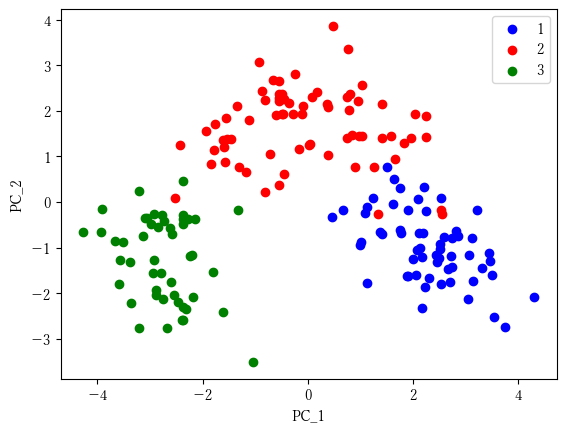

In [18]:
#Cell_17.
pca_x = X_pca[:, 0]
pca_y = X_pca[:, 1]
for i in range(len(classes)):
    cls = classes[i]
    c = colors[i]
    plt.scatter(pca_x[ser_class==cls], pca_y[ser_class==cls],
                c=c, label=cls)
plt.xlabel('PC_1')
plt.ylabel('PC_2')
plt.legend()
plt.show()

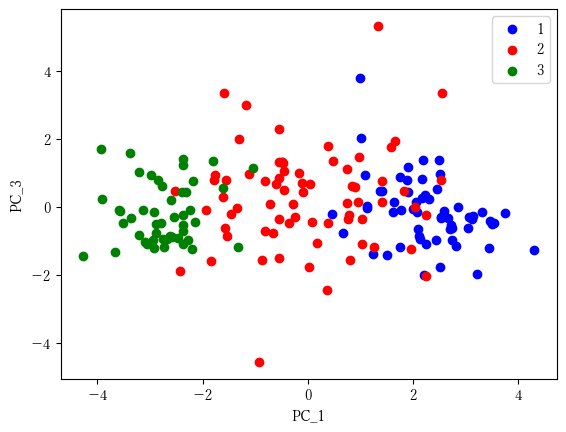

In [19]:
#Cell_18.
pca_x = X_pca[:, 0]
pca_y = X_pca[:, 2]
for i in range(len(classes)):
    cls = classes[i]
    c = colors[i]
    plt.scatter(pca_x[ser_class==cls], pca_y[ser_class==cls],
                c=c, label=cls)
plt.xlabel('PC_1')
plt.ylabel('PC_3')
plt.legend()
plt.show()

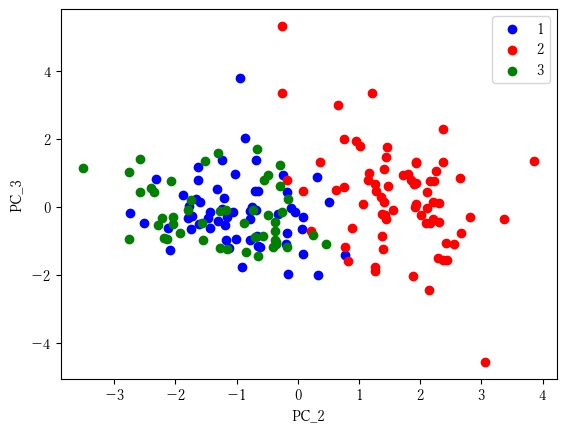

In [20]:
#Cell_19.
pca_x = X_pca[:, 1]
pca_y = X_pca[:, 2]
for i in range(len(classes)):
    cls = classes[i]
    c = colors[i]
    plt.scatter(pca_x[ser_class==cls], pca_y[ser_class==cls],
                c=c, label=cls)
plt.xlabel('PC_2')
plt.ylabel('PC_3')
plt.legend()
plt.show()

#### Draw biplot  

##### X axis is similar to feature "Flavanoides"  
##### Y axis is similar to inverse of feature "Color_intensity"  

#### X $\sim$ Flavanoids, Y $\sim$ $-$Color_intensity    

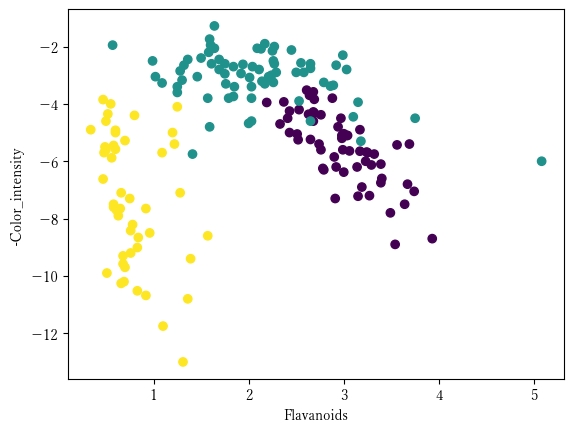

In [21]:
#Cell_21.
plt.scatter(dfX.loc[:, 'Flavanoids'],
            -dfX.loc[:, 'Color_intensity'], c=ser_class)
plt.xlabel('Flavanoids')
plt.ylabel('-Color_intensity')
plt.show()